# Análisis exploratorio de datos

Estamos trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. La tarea es encontrar patrones en la información disponible. El objetivo es comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

## Inicialización

Para inicar nuestro proyecto vamos a cargar nuestras librerias

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

## Cargar los datos

Vamos a cargar los datos de 3 dataset `project_sql_result_01.csv`, `project_sql_result_04.csv` y `project_sql_result_07.csv`

In [2]:
# Carga los archivos de datos
data_company = pd.read_csv('data/moved_project_sql_result_01.csv')
data_location = pd.read_csv('data/moved_project_sql_result_04.csv')
data_trip = pd.read_csv('data/moved_project_sql_result_07.csv')

In [3]:
# Verificamos que los datos se hayan cargado correctamente
print(data_company.head())
print()
print(data_location.head())
print()
print(data_trip.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


## Preparar los datos

Vamos a estudiar los datos que contienen nuestros datasets y verificar que los tipos de datos sean correctos para nuestro análisis

In [4]:
# Imprimimos la información general/resumen sobre nuestro primer dataset
data_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
# Se imprime una muestra de los datos
data_company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


El primer dataset `data_company` contiene los siguientes datos:
- `company_name`: nombre de la empresa de taxis.
- `trips_amount`: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

In [6]:
# Se imprime una descripción de los datos
data_company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [7]:
# Verificamos que no haya datos duplicados en el dataset
print('Datos duplicados en el dataset:', data_company.duplicated().sum())

Datos duplicados en el dataset: 0


Al ver la muestra y resumen del dataset no encontramos datos faltantes, duplicados y los tipos de datos son correctos

In [8]:
# Imprimimos la información general/resumen sobre nuestro segundo dataset
data_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [9]:
# Se imprime una muestra de los datos
data_location.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


El segundo dataset `data_location` contiene los siguientes datos:
- `dropoff_location_name`: barrios de Chicago donde finalizaron los viajes.
- `average_trips`: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

In [10]:
# Se imprime una descripción de los datos
data_location.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [11]:
# Verificamos que no haya datos duplicados en el dataset
print('Datos duplicados en el dataset:', data_location.duplicated().sum())

Datos duplicados en el dataset: 0


Al ver la muestra y resumen del dataset no encontramos datos faltantes ni duplicados, sin embargo el tipo de de dato de la columna `average_trips` vienen en float pero consideramos que pasarlo a int ayudaria a que el análisis sea más robusto

In [12]:
# Imprimimos la información general/resumen sobre el 3er dataset
data_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [13]:
# Se imprime una muestra de los datos
data_trip.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


El 3er dataset `data_trip` contiene los siguientes datos:
- `start_ts`: fecha y hora de recogida
- `weather_conditions`: condiciones climáticas en el momento en el que comenzó el viaje
- `duration_seconds`: duración del viaje en segundos

In [14]:
# Se imprime una descripción de los datos
data_trip.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [15]:
# Verificamos que no haya datos duplicados en el dataset
print('Datos duplicados en el dataset:', data_trip.duplicated().sum())

Datos duplicados en el dataset: 197


Al ver la muestra y resumen del dataset no encontramos datos faltantes sin embargo, tenemos datos duplicados que tenemos que corregir y ajustar los tipos de las columnas `start_ts` y `duration_seconds`. La primera columna hay que pasarla al formato de fecha y la ùltima columna hay que pasarla de float a int

### Corregir datos

Pasaremos el tipo de dato float a int para la columna `average_trips`

In [16]:
# Hacemos el cambio de tipo float a int
data_location['average_trips'] = data_location['average_trips'].astype(int)
# Verificamos que el cambio este hecho
data_location.head()

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546


Pasamos al dataset `data_trip` para hacer las correcciones de los tipos de datos

In [17]:
# Ajustamos la primera columna start_ts
data_trip['start_ts'] = pd.to_datetime(data_trip['start_ts'], format='%Y-%m-%d %H:%M:%S')
# Hacemos el cambio de tipo float a int en la segunda columna
data_trip['duration_seconds'] = data_trip['duration_seconds'].astype(int)
# Verificamos que este hecho el cambio correctamente
data_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 21.0+ KB


Eliminaremos los datos duplicados que encontramos

In [18]:
# Eliminacion de duplicados
data_trip = data_trip.drop_duplicates().reset_index(drop=True)

# Verificamos que esten eliminados
print('Datos duplicados en el dataset:', data_trip.duplicated().sum())

Datos duplicados en el dataset: 0


## Analizar los datos

### Top 10 principales barrios en términos de finalización

Como primer análisis, se identificaran los 10 principales barrios donde más viajes se terminen

In [19]:
top10_location = data_location.sort_values(by='average_trips', ascending=False).head(10)
top10_location

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


En el top 3 tenemos a los barrios de Loop, River North y Streeterville. El barrio Loop tiene un promedio de 10,727 viajes finalizados, es muy popular.

### Realizar visualizaciones

Para este apartado realizaremos 2 gráficos:
1. Las empresas de taxi y su número de viajes realizados
2. Top 10 barrios principales por el número de finalizaciones de viajes

<AxesSubplot:title={'center':'Top 10 compañias de taxis por número de viajes'}, ylabel='Nombre de la compañia'>

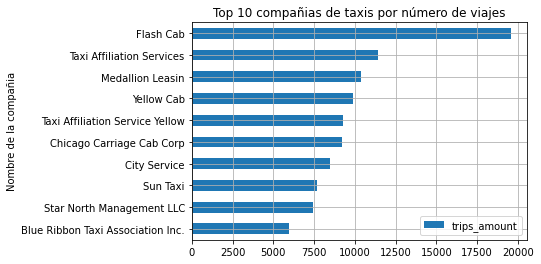

In [20]:
# Grafico de empresas y numero de viajes
data_company.sort_values(by='trips_amount', ascending=False).head(10).sort_values(by='trips_amount', ascending=True).plot.barh(x='company_name', title='Top 10 compañias de taxis por número de viajes',
                     grid=True, xlabel='Nombre de la compañia')

Podemos generar las siguientes conclusiones de la gráfica:
- Flash Cab domina los viajes en la zona con casi 20,000 viajes realizados entre el 15 y 16 de noviembre del 2017, el segundo por detrás de el es Taxi Affiliation Services con un poco más de 10,000 viajes realizados.

<AxesSubplot:title={'center':'Top 10 barrios por viajes finalizados'}, ylabel='Nombre del barrio'>

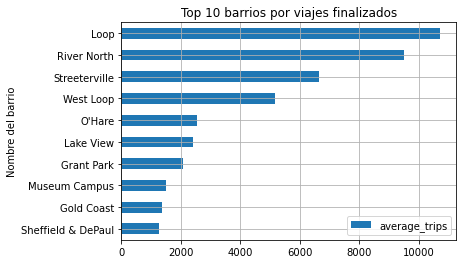

In [21]:
top10_location.sort_values(by='average_trips', ascending=True).plot.barh(x='dropoff_location_name', title='Top 10 barrios por viajes finalizados',
                     grid=True, xlabel='Nombre del barrio')

Podemos generar las siguientes conclusiones de la gráfica:
- El barrio de Loop es el barrio más popular ya que en el mes de noviembre recibio más de 10,000 viajes terminados en esta zona, quedando en 2da posición el barrio de River North con una media de 9,000 viajes terminados.
- Los barrios menos visitados del top 10 por los usuarios serian el barrio de Gold Coast, el Museum Campus y el Sheffield & DePaul con menos de 2000 viajes terminados en estas zonas

# Prueba de hipótesis

Para nuestro ultimo apartado, tenemos una hipotesis que deberemos probar y con base a los resultados daremos insights que puedan ayudarnos en nuestras conclusiones finales.

In [22]:
data_trip.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440


Una vez realizados los cambios, podemos seguir con nuestra prueba.

Las hipótesis a probar es la siguiente:
1. La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.
- Hipotesis nula: `La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos`
- Hipotesis alternativa: `La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos`
Para ello, ocuparemos la formula de la hipótesis sobre la igualdad de las medias de dos poblaciones y la prueba de Levene con un nivel de significancia estadistica critico del 5%.

In [23]:
# Seleccionamos la data de sabados lluviosos
data_sabados_lluvia = data_trip.query("weather_conditions == 'Bad'")['duration_seconds']

# Seleccionamos la data de sabados sin lluvia
data_sabados_sinlluvia = data_trip.query("weather_conditions == 'Good'")['duration_seconds']

alpha = 0.05 # el nivel de significancia estadística crítica

# Prueba Levene
results_levene = st.levene(data_sabados_lluvia, data_sabados_sinlluvia)

if results_levene.pvalue < alpha:
    equal_var=False
else:
    equal_var=True
    
print('El valor de equal_var es:', equal_var)
    
# Prueba T

results = st.ttest_ind(data_sabados_lluvia, data_sabados_sinlluvia, equal_var=equal_var)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

El valor de equal_var es: True
p-value:  7.397770692813604e-08
Rechazamos la hipótesis nula


Una vez realizado el test, tenemos el siguiente resultado:

- El resultado nos dice que las cantidades promedio son diferentes y que existe un probabilidad infima de obtener aleatoriamente una diferencia aleatoria de ese tamaño o mayor. Esta probabilidad es menor a nuestro nivel de significancia estadistica por lo que podemos concluir que existe una diferencia significativa entre los promedios de los viajes entre los dias lluviosos y los despejados.

# Conclusiones generales

Recopilando todos nuestros análisis y conclusiones intermedias; teniendo en cuenta nuestro objetivo principal de identificar patrones que nos permitan identificar si un juego tendra éxito o no, presentamos nuestras conclusiones finales del análisis.

- La compañia Flash Cab domina los viajes en la zona con casi 20,000 viajes realizados entre el 15 y 16 de noviembre del 2017, el segundo por detrás de el es Taxi Affiliation Services con un poco más de 10,000 viajes realizados por lo que podemos decir que son las compañias más solicitadas por los usuarios o las que más unidades tienen de servicio.
- Podemos notar que hay compañias privadas o pequeñas que ofrecen sus servicios pero son ocupadas muy poco, por lo que podemos concluir que los usuarios no confian mucho en estos servicios o bien puede ser que no haya muchos taxis disponibles
- El barrio de Loop es el barrio más popular ya que en el mes de noviembre recibio más de 10,000 viajes terminados en esta zona, quedando en 2da posición el barrio de River North con una media de 9,000 viajes terminados.
- Los barrios menos visitados por los usuarios serian el barrio de Gold Coast, el Museum Campus y el Sheffield & DePaul con menos de 2000 viajes terminados en estas zonas
- Se confirmo una diferencia significativa entre los promedios de duración de los viajes hechos en dias lluviosos y dias despejados, por lo que es un factor externo de suma importancia.